# Time Series Prediction with LSTM and RNN with Keras

In [1]:
!pip install matplotlib

# Load The DataSet with Visualization

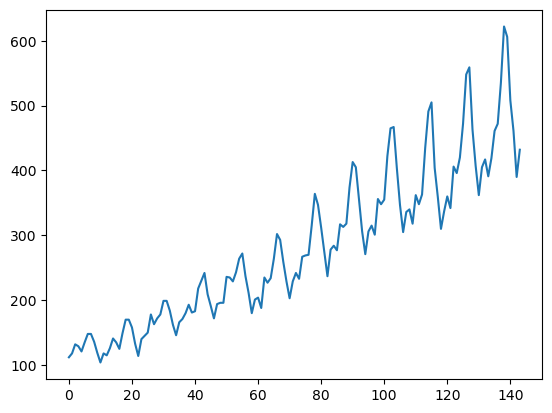

In [2]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv(r'E:\Gen_Ai\airline-passengers.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

In [3]:
!pip install tensorflow

# Required Packages Imporeted

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [5]:
# fix random seed for reproducibility
tf.random.set_seed(1)

In [6]:
# load the dataset
dataframe = pd.read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# Imported MinMaxScaler

In [7]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [8]:
# split into train and test sets
train_size = int(len(dataset) * 0.77)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

110 34


In [9]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [10]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [11]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [12]:
trainX

array([[[0.01544401, 0.02702703, 0.05405405]],

       [[0.02702703, 0.05405405, 0.04826255]],

       [[0.05405405, 0.04826255, 0.03281853]],

       [[0.04826255, 0.03281853, 0.05984557]],

       [[0.03281853, 0.05984557, 0.08494207]],

       [[0.05984557, 0.08494207, 0.08494207]],

       [[0.08494207, 0.08494207, 0.06177607]],

       [[0.08494207, 0.06177607, 0.02895753]],

       [[0.06177607, 0.02895753, 0.        ]],

       [[0.02895753, 0.        , 0.02702703]],

       [[0.        , 0.02702703, 0.02123553]],

       [[0.02702703, 0.02123553, 0.04247104]],

       [[0.02123553, 0.04247104, 0.07142857]],

       [[0.04247104, 0.07142857, 0.05984557]],

       [[0.07142857, 0.05984557, 0.04054055]],

       [[0.05984557, 0.04054055, 0.08687258]],

       [[0.04054055, 0.08687258, 0.12741312]],

       [[0.08687258, 0.12741312, 0.12741312]],

       [[0.12741312, 0.12741312, 0.10424709]],

       [[0.12741312, 0.10424709, 0.05598456]],

       [[0.10424709, 0.05598456, 0.01930

In [13]:
testX

array([[[0.4980695 , 0.47104248, 0.49999997]],

       [[0.47104248, 0.49999997, 0.6389961 ]],

       [[0.49999997, 0.6389961 , 0.7471043 ]],

       [[0.6389961 , 0.7471043 , 0.7741313 ]],

       [[0.7471043 , 0.7741313 , 0.57915056]],

       [[0.7741313 , 0.57915056, 0.492278  ]],

       [[0.57915056, 0.492278  , 0.3976834 ]],

       [[0.492278  , 0.3976834 , 0.44980696]],

       [[0.3976834 , 0.44980696, 0.49420848]],

       [[0.44980696, 0.49420848, 0.45945945]],

       [[0.49420848, 0.45945945, 0.5830116 ]],

       [[0.45945945, 0.5830116 , 0.5637065 ]],

       [[0.5830116 , 0.5637065 , 0.61003864]],

       [[0.5637065 , 0.61003864, 0.71042466]],

       [[0.61003864, 0.71042466, 0.8571429 ]],

       [[0.71042466, 0.8571429 , 0.8783784 ]],

       [[0.8571429 , 0.8783784 , 0.69305015]],

       [[0.8783784 , 0.69305015, 0.5849421 ]],

       [[0.69305015, 0.5849421 , 0.4980695 ]],

       [[0.5849421 , 0.4980695 , 0.58108103]],

       [[0.4980695 , 0.58108103, 0.60424

# Imported Sequenial Model

In [14]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


C:\Users\asus\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 2s - 15ms/step - loss: 0.0484
Epoch 2/100
106/106 - 0s - 2ms/step - loss: 0.0197
Epoch 3/100
106/106 - 0s - 3ms/step - loss: 0.0139
Epoch 4/100
106/106 - 0s - 3ms/step - loss: 0.0119
Epoch 5/100
106/106 - 0s - 3ms/step - loss: 0.0102
Epoch 6/100
106/106 - 0s - 3ms/step - loss: 0.0087
Epoch 7/100
106/106 - 0s - 3ms/step - loss: 0.0075
Epoch 8/100
106/106 - 0s - 3ms/step - loss: 0.0066
Epoch 9/100
106/106 - 0s - 3ms/step - loss: 0.0060
Epoch 10/100
106/106 - 0s - 3ms/step - loss: 0.0055
Epoch 11/100
106/106 - 1s - 6ms/step - loss: 0.0052
Epoch 12/100
106/106 - 0s - 3ms/step - loss: 0.0050
Epoch 13/100
106/106 - 0s - 3ms/step - loss: 0.0049
Epoch 14/100
106/106 - 0s - 3ms/step - loss: 0.0048
Epoch 15/100
106/106 - 0s - 3ms/step - loss: 0.0047
Epoch 16/100
106/106 - 0s - 3ms/step - loss: 0.0046
Epoch 17/100
106/106 - 0s - 3ms/step - loss: 0.0045
Epoch 18/100
106/106 - 0s - 3ms/step - loss: 0.0044
Epoch 19/100
106/106 - 0s - 3ms/step - loss: 0.0044
Epoch 20/100
106/106 - 0s - 3ms/

# Predicted The Test And Train Scores

In [15]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Train Score: 24.44 RMSE
Test Score: 62.10 RMSE


# Visualization

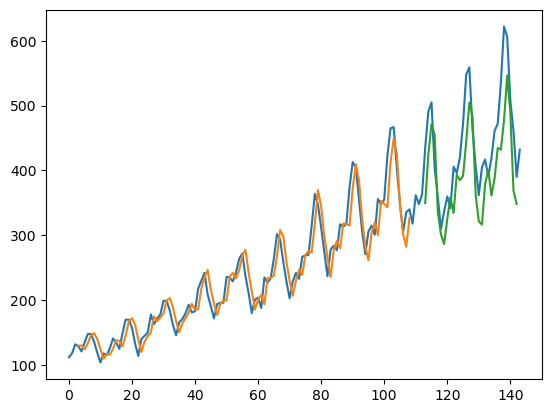

In [16]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [42]:
print("Shape of trainPredict:", trainPredict.shape)
print("Shape of trainY:", trainY.shape)
print("Shape of testPredict:", testPredict.shape)
print("Shape of testY:", testY.shape)
print("Shape of dataset:", dataset.shape)
print("Value of look_back:", look_back)

Shape of trainPredict: (106, 1)
Shape of trainY: (0, 106)
Shape of testPredict: (30, 1)
Shape of testY: (0, 30)
Shape of dataset: (144, 1)
Value of look_back: 3
